In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF



In [ ]:
human = pd.read_table('/content/gdrive/MyDrive/Colab Notebooks/DNA dataset/human.txt')
chimpanzee = pd.read_table('/content/gdrive/MyDrive/Colab Notebooks/DNA dataset/chimpanzee.txt')
dog = pd.read_table('/content/gdrive/MyDrive/Colab Notebooks/DNA dataset/dog.txt')

In [ ]:
human.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [ ]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
human['words'] = human['sequence'].apply(getKmers)

In [ ]:
human.head()

,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
words =list(human['words'])
human_seq = [' '.join(words[i]) for i in range(len(words))]

In [ ]:
human_seq[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaa

In [ ]:
vec = CountVectorizer(ngram_range=(5,5))
X = vec.fit_transform(human_seq)

In [ ]:
X[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(4380, 602855)

In [ ]:
# Model building

X_train, X_test, y_train, y_test = train_test_split(X,human['class'],test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3066, 602855)
(1314, 602855)


In [ ]:
knn =KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7975646879756468

In [ ]:
scores = []
k = []
for i in range(3,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  k.append(i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)

  scores.append(accuracy_score(y_test, pred))

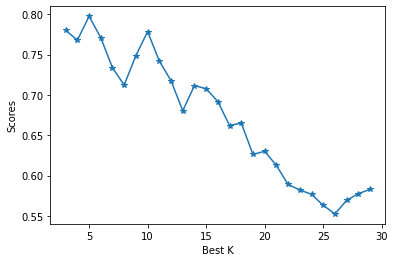

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k,scores, marker='*')
plt.xlabel('Best K')
plt.ylabel('Scores')
plt.show()

In [ ]:
knn = KNeighborsClassifier()
np.mean(cross_val_score(knn, X_train, y_train, cv=10))

0.7655127631943113

# Preprocessing Pipeline

In [ ]:
def Preprocess(sequence):

  sequence = sequence.apply(lambda sequence, size=6: [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)])
  sequence = sequence.apply(lambda seq: ' '.join(seq))
  
  vec = CountVectorizer(ngram_range=(5,5))
  
  return vec.fit_transform(sequence)

In [ ]:
def modeling(X, y):
  models = {
      'Logistic_reg': OneVsRestClassifier(LogisticRegression()),
      'Decisiontree': DecisionTreeClassifier(),
      'RandomForest':RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'MultinomialNB':MultinomialNB(),
      'KNN':KNeighborsClassifier()
      
  }

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, shuffle=True)

  best_models = []
  for model_name, model in models.items():
    clf = GridSearchCV(model,param_grid={}, scoring='accuracy', cv=5)
    clf.fit(X_train, y_train)
    print('\n')

    best_models.append({'model':model_name,'score':clf.best_score_, 'Accuracy on X_test': accuracy_score(y_test, y_pred)})
  
  return best_models


In [ ]:
seq = Preprocess(human['sequence'])

In [ ]:
seq.shape

(4380, 602855)

In [ ]:
modeling(seq, human['class'])

[{'model': 'Logistic_reg', 'score': 0.49178082191780825},
 {'model': 'Decisiontree', 'score': 0.3547945205479452},
 {'model': 'RandomForest', 'score': 0.5041095890410959},
 {'model': 'AdaBoost', 'score': 0.34406392694063925},
 {'model': 'MultinomialNB', 'score': 0.41963470319634705},
 {'model': 'KNN', 'score': 0.3372146118721461}]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(seq, human['class'], test_size= 0.3, random_state= 42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
# X_train[0].toarray()

0.7975646879756468

# Comparing Human Chimpanzee and Dog DNA

In [ ]:
h_dna = pd.read_table('/content/gdrive/MyDrive/Colab Notebooks/DNA dataset/human.txt')
ch_dna = pd.read_table('/content/gdrive/MyDrive/Colab Notebooks/DNA dataset/chimpanzee.txt')
d_dna = pd.read_table('/content/gdrive/MyDrive/Colab Notebooks/DNA dataset/dog.txt')

In [ ]:
h_dna = h_dna.drop('class', axis=1)
ch_dna = ch_dna.drop('class', axis=1)
d_dna = d_dna.drop('class', axis=1)

In [ ]:
# Human : 1, Chimpanzee: 2, Dog: 3

h_dna['label'] = np.full(h_dna.shape, 1)
ch_dna['label'] = np.full(ch_dna.shape, 2)
d_dna['label'] = np.full(d_dna.shape, 3)


In [ ]:
print(h_dna.shape)
print(ch_dna.shape)
print(d_dna.shape)

(4380, 2)
(1682, 2)
(820, 2)


In [ ]:
dna_df = pd.concat([h_dna.sample(1000),ch_dna.sample(1000),d_dna], ignore_index=True)

In [ ]:
dna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  2820 non-null   object
 1   label     2820 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.2+ KB


In [ ]:
dna_df['label'].unique()

array([1, 2, 3])

In [ ]:
dna_df['label'].value_counts()

1    1000
2    1000
3     820
Name: label, dtype: int64

In [ ]:
X = Preprocess(dna_df['sequence'])
X.shape

(2820, 713144)

In [ ]:
y = dna_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, shuffle=True)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.4385342789598109

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.3640661938534279

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5271867612293144

In [ ]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.4219858156028369

In [ ]:
scores = []
k = []
for i in range(3,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  k.append(i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)

  scores.append(accuracy_score(y_test, pred))



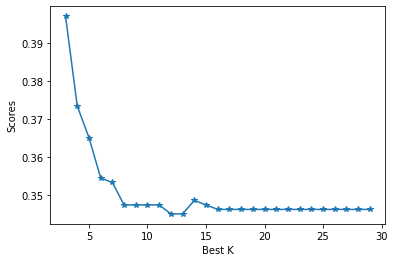

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k,scores, marker='*')
plt.xlabel('Best K')
plt.ylabel('Scores')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
rt = RandomForestClassifier(n_estimators=50)
naive = MultinomialNB()
ada = AdaBoostClassifier()

clf = VotingClassifier(estimators=[
            ('knn', knn), ('rt', rt), ('naive_bayes', naive), ('adaboost',ada)

],voting='hard')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.4645390070921986

In [ ]:
def build_model(base_estimator, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, shuffle=True)
  base_estimator.fit(X,y)
  y_pred = base_estimator.predict(X_test)

  print('Accuracy: ', accuracy_score(y_test, y_pred))
  print('\n')
  
  cf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_mat, annot=True)
  plt.show()

  print('\n')

  # print('ROC', roc_auc_score(y_test, base_estimator.predict_proba(X_test)[:,1]))

  print('\n')
  
  print(classification_report(y_test, y_pred))

In [ ]:
def Preprocess(sequence, Vectorizer):

  sequence = sequence.apply(lambda sequence, size=6: [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)])
  sequence = sequence.apply(lambda seq: ' '.join(seq))
  
  vec = Vectorizer(ngram_range=(6,6))
  
  return vec.fit_transform(sequence)

In [ ]:
def modeling(X, y):
  models = {
      'Logistic_reg': OneVsRestClassifier(LogisticRegression()),
      'Decisiontree': DecisionTreeClassifier(),
      'RandomForest':RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'MultinomialNB':MultinomialNB(),
      'KNN':KNeighborsClassifier()
      
  }

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, shuffle=True)

  for model_name, model in models.items():
    clf = GridSearchCV(model,param_grid={}, scoring='accuracy', cv=5)
    clf.fit(X_train, y_train)
    clf.predict(X_test)
    print('\n')
    print(model_name)
    
    print('\n')
    print('Best Score: ')
    print(clf.best_score_)

    print('\n')
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('\n')
  
    cf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_mat, annot=True)
    plt.show()

    print('\n')
    
    print(classification_report(y_test, y_pred))
    print('End Training.....\n\n')

(2820, 1362892)
Accuracy:  0.9964539007092199




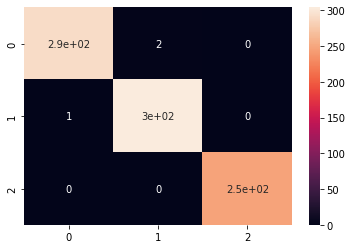





              precision    recall  f1-score   support

           1       1.00      0.99      0.99       293
           2       0.99      1.00      1.00       305
           3       1.00      1.00      1.00       248

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



In [ ]:
X = Preprocess(dna_df['sequence'],CountVectorizer)
y = dna_df['label']

print(X.shape)
build_model(RandomForestClassifier(),X,y)


(2820, 1048576)
Accuracy:  0.9964539007092199




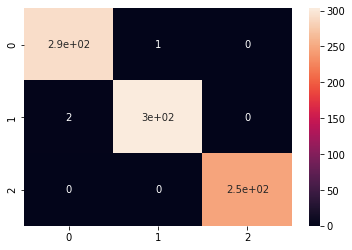





              precision    recall  f1-score   support

           1       0.99      1.00      0.99       293
           2       1.00      0.99      1.00       305
           3       1.00      1.00      1.00       248

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



In [ ]:
X = Preprocess(dna_df['sequence'],HashingVectorizer)
y = dna_df['label']

print(X.shape)
build_model(RandomForestClassifier(),X,y)


(2820, 1362892)
Accuracy:  0.5366430260047281




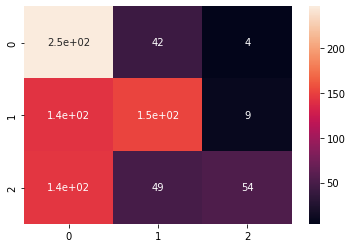





              precision    recall  f1-score   support

           1       0.46      0.84      0.60       293
           2       0.63      0.50      0.56       305
           3       0.81      0.22      0.34       248

    accuracy                           0.54       846
   macro avg       0.63      0.52      0.50       846
weighted avg       0.62      0.54      0.51       846



In [ ]:
X = Preprocess(dna_df['sequence'],TfidfVectorizer)
y = dna_df['label']

print(X.shape)
build_model(KNeighborsClassifier(),X,y)


(2820, 1362892)
Accuracy:  0.8498817966903073




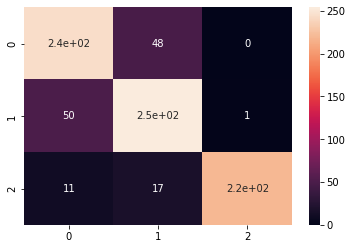





              precision    recall  f1-score   support

           1       0.80      0.84      0.82       293
           2       0.80      0.83      0.81       305
           3       1.00      0.89      0.94       248

    accuracy                           0.85       846
   macro avg       0.86      0.85      0.86       846
weighted avg       0.86      0.85      0.85       846



In [ ]:
X = Preprocess(dna_df['sequence'],TfidfVectorizer)
y = dna_df['label']

print(X.shape)
build_model(MultinomialNB(),X,y)


(2820, 1362892)
Accuracy:  0.9976359338061466




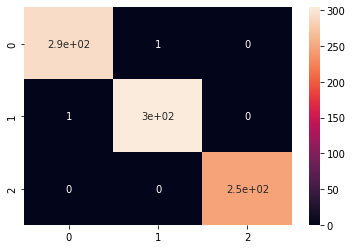





              precision    recall  f1-score   support

           1       1.00      1.00      1.00       293
           2       1.00      1.00      1.00       305
           3       1.00      1.00      1.00       248

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



In [ ]:
X = Preprocess(dna_df['sequence'],TfidfVectorizer)
y = dna_df['label']

print(X.shape)
build_model(RandomForestClassifier(),X,y)


Accuracy:  0.5283687943262412




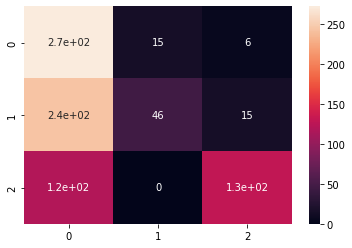





              precision    recall  f1-score   support

           1       0.43      0.93      0.59       293
           2       0.75      0.15      0.25       305
           3       0.86      0.52      0.65       248

    accuracy                           0.53       846
   macro avg       0.68      0.53      0.50       846
weighted avg       0.67      0.53      0.48       846



In [ ]:
# X = Preprocess(dna_df['sequence'],TfidfVectorizer)
# y = dna_df['label']

# print(X.shape)
# AdaBoost
build_model(AdaBoostClassifier(),X,y)

Accuracy:  0.9976359338061466




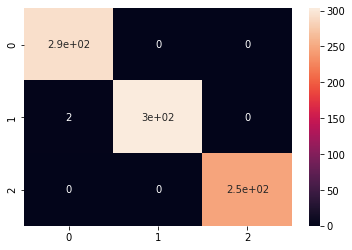





              precision    recall  f1-score   support

           1       0.99      1.00      1.00       293
           2       1.00      0.99      1.00       305
           3       1.00      1.00      1.00       248

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



In [ ]:
# X = Preprocess(dna_df['sequence'],TfidfVectorizer)
# y = dna_df['label']

# print(X.shape)
build_model(DecisionTreeClassifier(),X,y)


In [ ]:
# Preprocess Data
# Standardize
# Evaluate Model

X = Preprocess(dna_df['sequence'],TfidfVectorizer)
y = dna_df['label']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# modeling(X_scaled, y)

NameError: ignored